In [1]:
from ORBIT import ProjectManager
from ORBIT.phases.design import ElectricalDesign
import matplotlib.pyplot as plt
import numpy as np

## Cost Curves  
#### Vary Plant Capacity

In [2]:
cap = np.arange(100,2010,10)
i = 0
mpt_cost = [0] * len(cap)
capex_list = [None] * len(cap)
for x in cap:
    config = {
        'export_cable_install_vessel': 'example_cable_lay_vessel',
        'site': {'distance': 100, 'depth': 20, 'distance_to_landfall': 50},
        'plant': {'num_turbines': (x/10), 'capacity': x},
        'turbine': {'turbine_rating': 10},
        'oss_install_vessel': 'example_heavy_lift_vessel',
        'feeder': 'future_feeder',
        'export_system_design': {
            'cables': "XLPE_500mm_220kV",
    #         'num_redundant': 'int (optional)',
    #         'touchdown_distance': 'm (optional, default: 0)',
    #         'percent_added_length': 'float (optional)'
        },
    #     'substation_design': {
    #         'mpt_cost_rate': 'USD/MW (optional)',
    #         'topside_fab_cost_rate': 'USD/t (optional)',
    #         'topside_design_cost': 'USD (optional)',
    #         'shunt_cost_rate': 'USD/MW (optional)',
    #         'switchgear_costs': 'USD (optional)',
    #         'backup_gen_cost': 'USD (optional)',
    #         'workspace_cost': 'USD (optional)',
    #         'other_ancillary_cost': 'USD (optional)',
    #         'topside_assembly_factor': 'float (optional)',
    #         'oss_substructure_cost_rate': 'USD/t (optional)',
    #         'oss_pile_cost_rate': 'USD/t (optional)',
    #         'num_substations': 'int (optional)'
    #     },

        'design_phases': ['ElectricalDesign'],
        'install_phases': [
            'ExportCableInstallation',
            'OffshoreSubstationInstallation'
        ],
    }
    design = ElectricalDesign(config)
    design.run()
    mpt_cost[i] = design.mpt_cost
    #print(x, ":", design.num_cables)
#     print("shunt reactor costs = ", design.shunt_reactor_cost)
#     print("switchgear costs = ", design.switchgear_costs)
#     print("topside costs = ", design.topside_cost)
#     print("ancillary system costs = ", design.ancillary_system_cost)
#     print("land assembly costs = ", design.land_assembly_cost)

    project = ProjectManager(config)
    project.run()
    capex_list[i] = project.capex_breakdown
    i = i + 1


ORBIT library intialized at 'C:\Users\sbredenk\ORBIT\library'
OffshoreSubstationInstallation:
OffshoreSubstationInstallation:
OffshoreSubstationInstallation:
OffshoreSubstationInstallation:
OffshoreSubstationInstallation:
OffshoreSubstationInstallation:
OffshoreSubstationInstallation:
OffshoreSubstationInstallation:
OffshoreSubstationInstallation:
OffshoreSubstationInstallation:
OffshoreSubstationInstallation:
OffshoreSubstationInstallation:
OffshoreSubstationInstallation:
OffshoreSubstationInstallation:
OffshoreSubstationInstallation:
OffshoreSubstationInstallation:
OffshoreSubstationInstallation:
OffshoreSubstationInstallation:
OffshoreSubstationInstallation:
OffshoreSubstationInstallation:
OffshoreSubstationInstallation:
OffshoreSubstationInstallation:
OffshoreSubstationInstallation:
OffshoreSubstationInstallation:
OffshoreSubstationInstallation:
OffshoreSubstationInstallation:
OffshoreSubstationInstallation:
OffshoreSubstationInstallation:
OffshoreSubstationInstallation:
OffshoreSu

#### Vary Distance to Shore

In [3]:
dist = [40, 80, 100, 140, 180, 200]
i = 0
mpt_cost = [0] * len(dist)
capex_list_dist = [None] * len(dist)
for x in dist:
    config = {
        'export_cable_install_vessel': 'example_cable_lay_vessel',
        'site': {'distance': 100, 'depth': 20, 'distance_to_landfall': x},
        'plant': {'num_turbines': 60, 'capacity': 600},
        'turbine': {'turbine_rating': 10},
        'oss_install_vessel': 'example_heavy_lift_vessel',
        'feeder': 'future_feeder',
        'export_system_design': {
            'cables': "XLPE_500mm_220kV",
    #         'num_redundant': 'int (optional)',
    #         'touchdown_distance': 'm (optional, default: 0)',
    #         'percent_added_length': 'float (optional)'
        },
    #     'substation_design': {
    #         'mpt_cost_rate': 'USD/MW (optional)',
    #         'topside_fab_cost_rate': 'USD/t (optional)',
    #         'topside_design_cost': 'USD (optional)',
    #         'shunt_cost_rate': 'USD/MW (optional)',
    #         'switchgear_costs': 'USD (optional)',
    #         'backup_gen_cost': 'USD (optional)',
    #         'workspace_cost': 'USD (optional)',
    #         'other_ancillary_cost': 'USD (optional)',
    #         'topside_assembly_factor': 'float (optional)',
    #         'oss_substructure_cost_rate': 'USD/t (optional)',
    #         'oss_pile_cost_rate': 'USD/t (optional)',
    #         'num_substations': 'int (optional)'
    #     },

        'design_phases': ['ElectricalDesign'],
        'install_phases': [
            'ExportCableInstallation',
            'OffshoreSubstationInstallation'
        ],
    }
    design = ElectricalDesign(config)
    design.run()
    mpt_cost[i] = design.mpt_cost
#     print("shunt reactor costs = ", design.shunt_reactor_cost)
#     print("switchgear costs = ", design.switchgear_costs)
#     print("topside costs = ", design.topside_cost)
#     print("ancillary system costs = ", design.ancillary_system_cost)
#     print("land assembly costs = ", design.land_assembly_cost)
    project = ProjectManager(config)
    project.run()
    capex_list_dist[i] = project.capex_breakdown
    i = i + 1


### Extract and Plot Cable + Substation Costs  
#### By Plant Cap


In [4]:
i = 0
cable_cost = [0] * len(cap)
oss_cost = [0] * len(cap)
for x in capex_list:
    cable_cost[i] = x.get('Export System')
    oss_cost[i] = x.get('Offshore Substation')
    i = i + 1

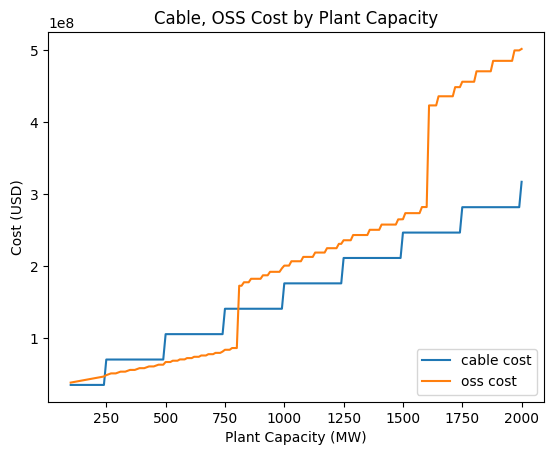

In [5]:
plt.plot(cap, cable_cost)
plt.plot(cap, oss_cost)
plt.title("Cable, OSS Cost by Plant Capacity")
plt.xlabel("Plant Capacity (MW)")
plt.ylabel("Cost (USD)")
plt.legend(["cable cost","oss cost"], loc = "lower right")
plt.show()

#### By Distance

In [6]:
i = 0
cable_cost_dist = [0] * len(dist)
oss_cost_dist = [0] * len(dist)
for x in capex_list_dist:
    cable_cost_dist[i] = x.get('Export System')
    oss_cost_dist[i] = x.get('Offshore Substation')
    i = i + 1

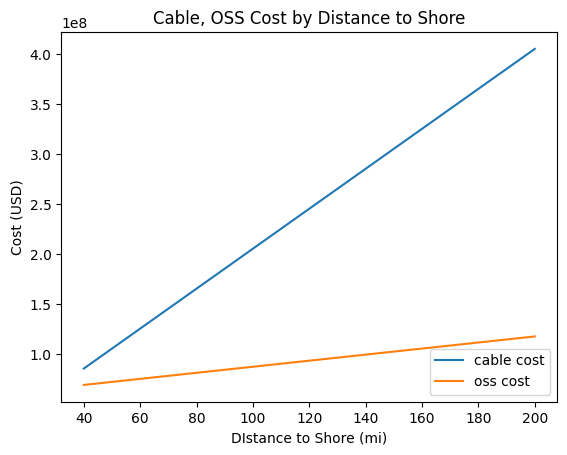

In [7]:
plt.plot(dist, cable_cost_dist)
plt.plot(dist, oss_cost_dist)
plt.title("Cable, OSS Cost by Distance to Shore")
plt.xlabel("DIstance to Shore (mi)")
plt.ylabel("Cost (USD)")
plt.legend(["cable cost","oss cost"], loc = "lower right")
plt.show()

In [8]:
print(cable_cost_dist)


[85824900.0, 165624900.0, 205524900.0, 285324900.00000006, 365124900.00000006, 405024900.00000006]
